# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import sqlite3
conn = sqlite3.connect('../../assets/datasets/adult.sqlite')
c = conn.cursor()
df = pd.read_sql("SELECT * FROM adult;", conn)

### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
salary            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [3]:
# fill the n.a with ???
df = df.fillna('???')

> Other possible strategies:
- fill with media value
- sample values out of the column distribution
- build a model that predicts the missing values from the other columns

## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [4]:
target = df.salary != '<=50K'

#alternative 
#target = [1 if i == '>50K' else 0 for i in data['salary']]

### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

> Some and some

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

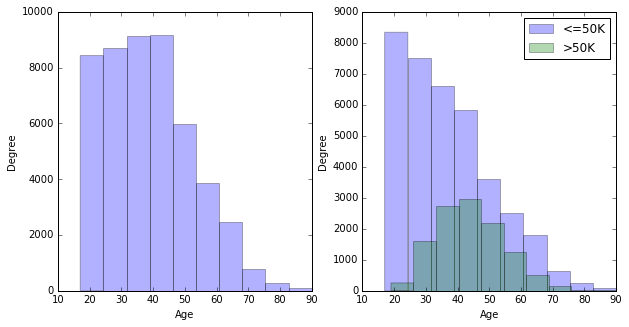

In [5]:
plt.figure(figsize = (10,5))
plt.subplot(121)
df.age.plot(kind='hist', alpha = 0.3)
plt.xlabel('Age')

plt.subplot(122)
df[~target].age.plot(kind='hist', alpha = 0.3)
df[target].age.plot(kind='hist', alpha = 0.3)
plt.legend(['<=50K', '>50K'])
plt.xlabel('Age')

The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

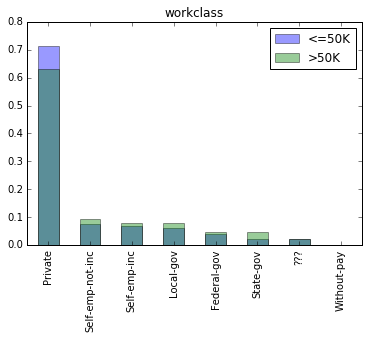

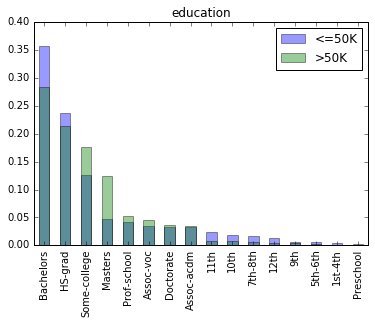

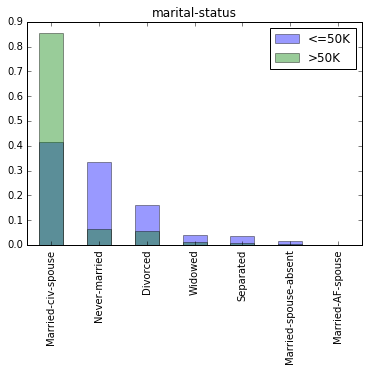

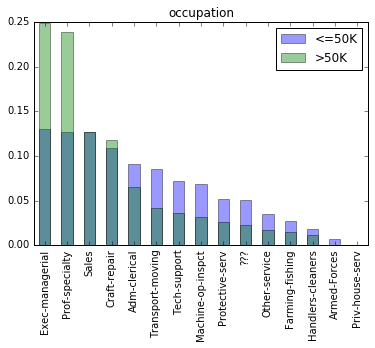

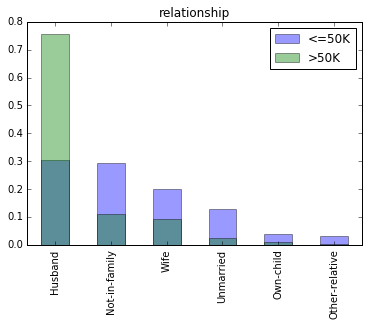

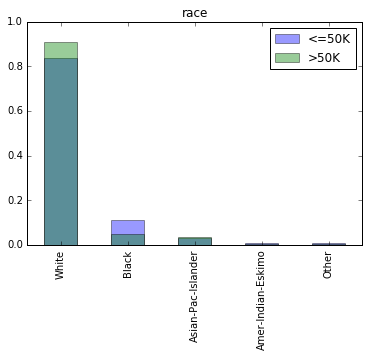

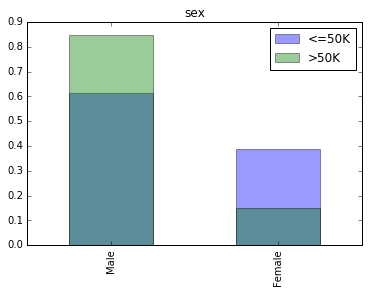

In [6]:
catcols = [u'workclass', u'education', u'marital-status',
           u'occupation', u'relationship', u'race', u'sex']

for c in catcols:
    plt.figure()
    (df.loc[~target,c].value_counts() / df.loc[~target,c].count()).plot(kind='bar', alpha = 0.4, color = 'blue')
    (df.loc[target,c].value_counts() / df.loc[target,c].count()).plot(kind='bar', alpha = 0.4, color = 'green')
    plt.legend(['<=50K', '>50K'])
    plt.title(c)


### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

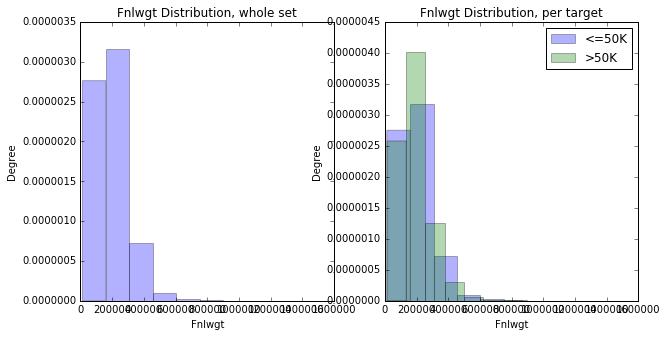

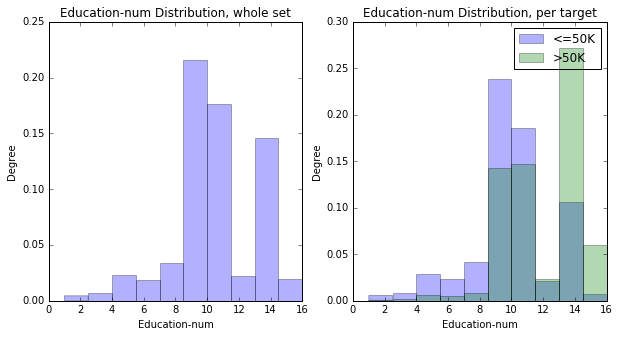

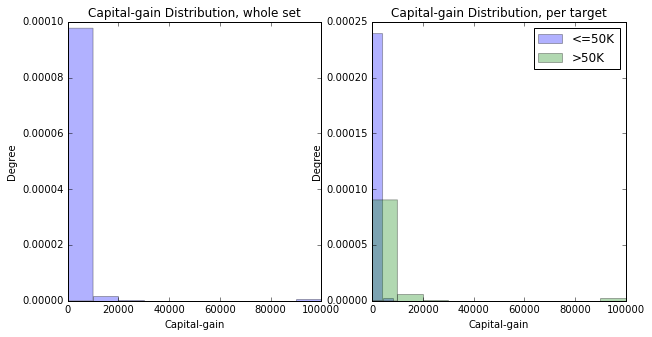

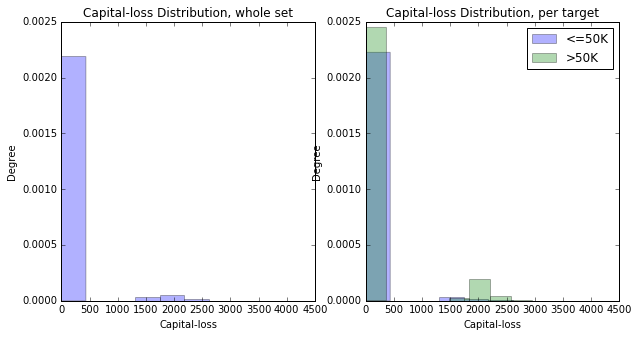

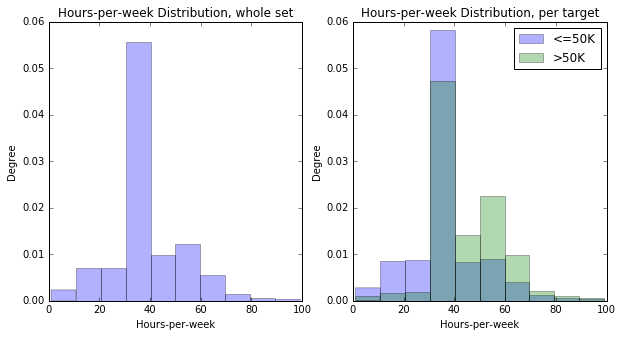

In [7]:
def do_plot_hist(feat):
    plt.figure(figsize = (10,5))
    plt.subplot(121)
    df[feat].plot(kind='hist', alpha = 0.3, normed = True)
    plt.xlabel(feat.capitalize())
    plt.title(feat.capitalize() + ' Distribution, whole set')

    plt.subplot(122)
    df[~target][feat].plot(kind='hist', alpha = 0.3, normed = True)
    df[target][feat].plot(kind='hist', alpha = 0.3, normed = True)
    plt.legend(['<=50K', '>50K'])
    plt.xlabel(feat.capitalize())
    plt.title(feat.capitalize() + ' Distribution, per target')

for c in [u'fnlwgt', u'education-num', u'capital-gain',
          u'capital-loss', u'hours-per-week']:
    do_plot_hist(c)

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [8]:
dummies = pd.get_dummies(df[['workclass','education','marital-status',
                             'occupation','relationship','race','sex',
                             'native-country']])

In [9]:
dummies.head()

,workclass_???,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

In [10]:
ncols = ['age', 'fnlwgt', 'education-num',
         'capital-gain', 'capital-loss', 'hours-per-week']

numerical = df[ncols]

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
ns = mms.fit_transform(numerical)
scaled_cols = ['scaled_'+s for s in ncols]
numerical_scaled = pd.DataFrame(ns, columns = scaled_cols)

In [11]:
numerical_scaled.head()

,scaled_age,scaled_fnlwgt,scaled_education-num,scaled_capital-gain,scaled_capital-loss,scaled_hours-per-week
0,0.301370,0.044131,0.800000,0.02174,0,0.397959
1,0.452055,0.048052,0.800000,0.00000,0,0.122449
2,0.287671,0.137581,0.533333,0.00000,0,0.397959
3,0.493151,0.150486,0.400000,0.00000,0,0.397959
4,0.150685,0.220635,0.800000,0.00000,0,0.397959


## 6. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

In [12]:
X = pd.concat([dummies, numerical_scaled], axis=1)
y = df.salary == '>50K'

y.value_counts()/len(y) #want to know percentage of instances that you are trying to predict

False    0.760718
True     0.239282
dtype: float64

> Saying everyone is in the <=50K class has a 76% accuracy

## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
clf = KNeighborsClassifier(5)

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
# May take a few minutes to run
cross_val_score(KNeighborsClassifier(5), X, y)

In [ ]:
cross_val_score(LogisticRegression(), X, y)

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
lr = LogisticRegression(C=100.0)#, class_weight='balanced') #class_weight='balance' 

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print classification_report(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
clf = GridSearchCV(LogisticRegression(class_weight='balanced'),
                   {"C":[0.01,0.1,1.0,10.0,100.0]},
                   n_jobs=-1
                  )

In [ ]:
clf.fit(X, y)

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_params_